# Examples
[Solovjov (2017)](http://dx.doi.org/10.1016/j.jqsrt.2017.01.034) provides five examples for testing the RCSLW model. We reproduce those examples here, labeled S1-S5. 

[Bordbar (2020)](https://doi.org/10.1016/j.icheatmasstransfer.2019.104400) provides four examples and we reproduce example 3 here, labeled B3. 

[Solovjov (2001)](https://doi.org/10.1115/1.1350824) provides two examples with soot. We reproduce example 1 here, labeled Sb1. 

These are one-dimensional plane parallel configurations with varying domain width, temperature, and composition profiles. Comparisons are made of the radiative heat flux or volumetric radiative source term for the Planck Mean, WSGG, and RCSLW models. The line-by-line (LBL) data are taken directly from the plots presented in the cited papers. For the RCSLW model, we use the same number of gray gases (four) as in the WSGG model to provide more relevant comparison. In example 5, we show variation in the RCSLW model for different number of gases. In initializing the RCSLW model, average gas properties are used for all examples. Example S5 shows improved results when using the peak temperature instead of the average.

The motivation for each example is provided in the references. Here, we present the examples to demonstrate the code and give comparisons between the models with available LBL data.

## Important: Python path
* Make sure your PYTHONPATH environment variable includes the path to the python module.
* For example, this can be set in your ```.bashrc``` file.
* Alternatively, you can include the following code here, but edit the path.
```python
import sys
sys.path.append('/path/to/the/radlib/installation/lib/pythonX.Y/site-packages')
```

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams.update({'font.size':16, 'figure.autolayout': True});

class _hide_print:
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._stdout
        
from ex_S1  import ex_S1
from ex_S2  import ex_S2
from ex_S3  import ex_S3
from ex_S4  import ex_S4
from ex_S5  import ex_S5
from ex_B3  import ex_B3
from ex_Sb1 import ex_Sb1

# Example S1

* This example consists of a uniform, isothermal hot gas layer at $T_{hot}$=2000 K, next to a uniform, isothermal cold gas layer at $T_{cold}$=300 K. 
* P = 1 atm.
* The gas composition throughout is a mixture of water vapor and CO$_2$ with mole fractions $y_{H2O}=0.2$, and $Y_{CO2}$=0.1. 
* The radiative flux at the exit of the cold layer is computed.
* The hot layer thickness is fixed at $L_{hot}=0.5$. The cold layer thickness varies.
* Boundaries are black and cold (outgoing intensity is zero).

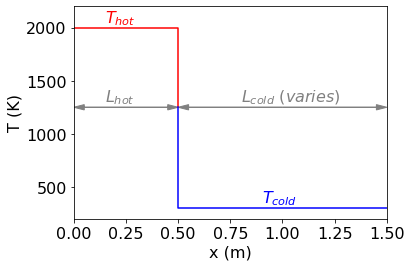

In [2]:
fig, ax = plt.subplots()
ax.plot([0,0.5,0.5],   [2000,2000,1250], color='red')
ax.plot([0.5,0.5,1.5], [1250,300,300],   color='blue')
ax.set_xlabel('x (m)')
ax.set_ylabel('T (K)')
ax.set_xlim([0,1.5])
ax.set_ylim([200,2200])
ax.text(0.9,350,r'$T_{cold}$', color='blue')
ax.text(0.15,2050,r'$T_{hot}$', color='red')
ax.arrow(1,1250, 0.5,0,  fc='gray', ec='gray', head_width=50, head_length=0.05, length_includes_head=True)
ax.arrow(1,1250, -0.5,0, fc='gray', ec='gray', head_width=50, head_length=0.05, length_includes_head=True)
ax.text(0.8, 1300,r'$L_{cold}\,\,(varies)$', color='gray')
ax.arrow(0.25,1250, 0.25,0,  fc='gray', ec='gray', head_width=50, head_length=0.05, length_includes_head=True)
ax.arrow(0.25,1250, -0.25,0, fc='gray', ec='gray', head_width=50, head_length=0.05, length_includes_head=True)
ax.text(0.15,1300,r'$L_{hot}$',  color='gray');

In [24]:
with _hide_print():
    Lcold, qsigT4_pm    = ex_S1('planckmean')
    Lcold, qsigT4_wsgg  = ex_S1('wsgg')
    Lcold, qsigT4_rcslw = ex_S1('rcslw', 4)

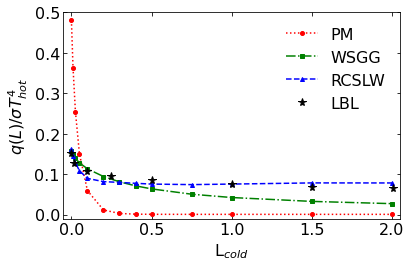

In [25]:
#-------------- LBL data

lbl  = np.loadtxt('LBLdata/ex_S1_LBL.dat')

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots();
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(Lcold, qsigT4_pm,    'ro:',  markersize=4)
ax.plot(Lcold, qsigT4_wsgg,  'gs-.', markersize=4)
ax.plot(Lcold, qsigT4_rcslw, 'b^--', markersize=4)
ax.plot(lbl[:,0], lbl[:,1],  'k*',   markersize=8)

ax.legend(['PM', 'WSGG', 'RCSLW', 'LBL'], frameon=False)
ax.set_xlabel(r'L$_{cold}$')
ax.set_ylabel(r'$q(L)/\sigma T_{hot}^4$');
ax.set_xlim([-0.05,2.05])
ax.set_ylim([-0.01, 0.5]);
plt.savefig('ex_S1.pdf');

# Example S2
* This example is like example 1, but the temperature is isothermal at T=1000 K throughout.
* P = 1 atm.
* There is a *thick* layer with $L_{thick}=0.5$ m and a *thin* layer with varying width.
* The participating gas is CO$_2$ throughout.
* The mole fraction of $CO_2$ is 0.4 in the thick layer and 0.1 in the thin layer.
* The boundaries are black and cold. 

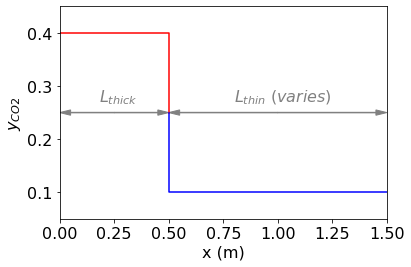

In [6]:
fig, ax = plt.subplots()
ax.plot([0,0.5,0.5],   [0.4,0.4,0.25], color='red')
ax.plot([0.5,0.5,1.5], [0.25,0.1,0.1], color='blue')
ax.set_xlabel('x (m)')
ax.set_ylabel(r'$y_{CO2}$')
ax.set_xlim([0,1.5])
ax.set_ylim([0.05, 0.45])
ax.arrow(1,0.25, 0.5,0, fc='gray', ec='gray', head_width=0.01, head_length=0.05, length_includes_head=True)
ax.arrow(1,0.25,-0.5,0, fc='gray', ec='gray', head_width=0.01, head_length=0.05, length_includes_head=True)
ax.text(0.8, 0.27,r'$L_{thin}\,\,(varies)$', color='gray')
ax.arrow(0.25,0.25, 0.25,0, fc='gray', ec='gray', head_width=0.01, head_length=0.05, length_includes_head=True)
ax.arrow(0.25,0.25,-0.25,0, fc='gray', ec='gray', head_width=0.01, head_length=0.05, length_includes_head=True)
ax.text(0.18,0.27,r'$L_{thick}$',  color='gray');

In [7]:
with _hide_print():
    Lcold, qsigT4_pm    = ex_S2('planckmean')
    Lcold, qsigT4_wsgg  = ex_S2('wsgg')
    Lcold, qsigT4_rcslw = ex_S2('rcslw', 4)       # perfect agreement with nGG=8

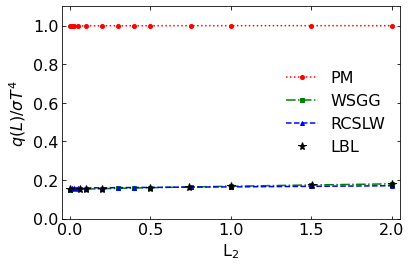

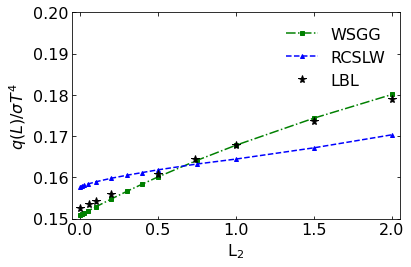

In [8]:
#-------------- LBL data

lbl  = np.loadtxt('LBLdata/ex_S2_LBL.dat')

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(Lcold, qsigT4_pm,    'ro:',  markersize=4)
ax.plot(Lcold, qsigT4_wsgg,  'gs-.', markersize=4)
ax.plot(Lcold, qsigT4_rcslw, 'b^--', markersize=4)
ax.plot(lbl[:,0], lbl[:,1],  'k*',   markersize=8)

ax.legend(['PM', 'WSGG', 'RCSLW', 'LBL'], frameon=False)

ax.set_xlabel(r'L$_2$')
ax.set_ylabel(r'$q(L)/\sigma T^4$')
ax.set_xlim([-0.05,2.05])
ax.set_ylim([0.0, 1.1]);
plt.savefig('ex_S2a.pdf');

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(Lcold, qsigT4_wsgg,  'gs-.', markersize=4)
ax.plot(Lcold, qsigT4_rcslw, 'b^--', markersize=4)
ax.plot(lbl[:,0], lbl[:,1],  'k*',   markersize=8)

ax.legend(['WSGG', 'RCSLW', 'LBL'], frameon=False)

ax.set_xlabel(r'L$_2$')
ax.set_ylabel(r'$q(L)/\sigma T^4$')
ax.set_xlim([-0.05,2.05])
ax.set_ylim([0.15, 0.2]);
plt.savefig('ex_S2b.pdf');

# Example S3
* L = 1 m domain
* P = 1 atm
* Parabolic temperature profile: $T(x) = 4000x(L-x)/L^2 + 800$ K.
* T$_{wall}$ = 800 K (black)
* The participating gas is water vapor with mole fraction profile $y_{H2O}(x)=0.8x(L-x)/L^2+0.12.$

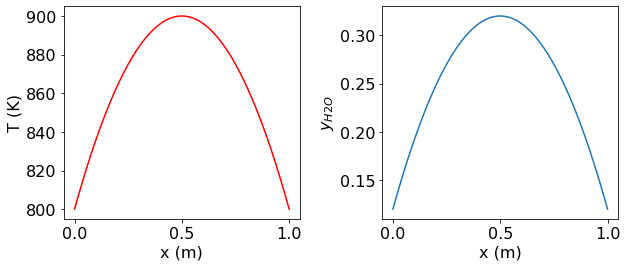

In [9]:
L = 1
x = np.linspace(0,L,100)
T = 400*x*(L-x)/L**2 + 800
y = 0.8*x*(L-x)/L**2 + 0.12

fig,ax=plt.subplots(1,2,figsize=(9,4))
ax[0].plot(x,T,color='red')
ax[0].set_xlabel('x (m)')
ax[0].set_ylabel('T (K)')
ax[1].plot(x,y)
ax[1].set_xlabel('x (m)')
ax[1].set_ylabel(r'$y_{H2O}$');

In [10]:
with _hide_print():
    xQ, Qpm    = ex_S3('planckmean')
    xQ, Qwsgg  = ex_S3('wsgg')
    xQ, Qrcslw = ex_S3('rcslw', 4)
    

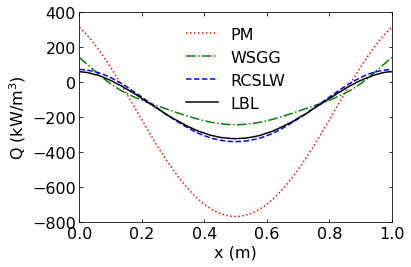

In [11]:
#-------------- LBL data

lbl  = np.loadtxt('LBLdata/ex_S3_LBL.dat')

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(xQ, Qpm/1000,    'r:')
ax.plot(xQ, Qwsgg/1000,  'g-.')
ax.plot(xQ, Qrcslw/1000, 'b--')
ax.plot(lbl[:,0], lbl[:,1], 'k-')

ax.legend(['PM', 'WSGG', 'RCSLW', 'LBL'], frameon=False)

ax.set_xlabel(r'x (m)')
ax.set_ylabel(r'Q (kW/m$^3$)')
ax.set_xlim([0,1])
ax.set_ylim([-800,400]);
plt.savefig('ex_S3.pdf');


# Example S4
* L = 1 m domain
* P = 1 atm
* Uniform composition of water vapor with a mole fraction of 0.1
* Black walls at 500 K
* Triangular temperature profile centered at x=0.15 m with a base width of 0.1 m and a peak temperature of 2500 K.

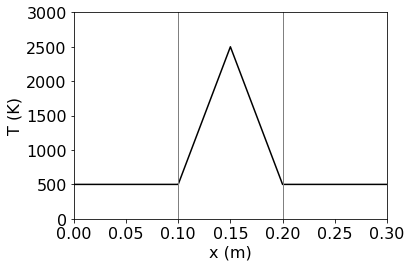

In [12]:
fig, ax = plt.subplots()
ax.plot([0,0.1,0.15,0.2,0.3],   [500,500,2500,500,500], 'k-')
ax.plot([0.1,0.1],[0,3000], color='gray', linewidth=1)
ax.plot([0.2,0.2],[0,3000], color='gray', linewidth=1)
ax.set_xlabel('x (m)')
ax.set_ylabel('T (K)')
ax.set_xlim([0,0.3])
ax.set_ylim([0,3000]);

In [13]:
with _hide_print():
    xQ, Qpm    = ex_S4('planckmean')
    xQ, Qwsgg  = ex_S4('wsgg')
    xQ, Qrcslw = ex_S4('rcslw', 4)

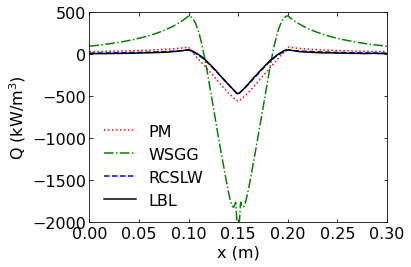

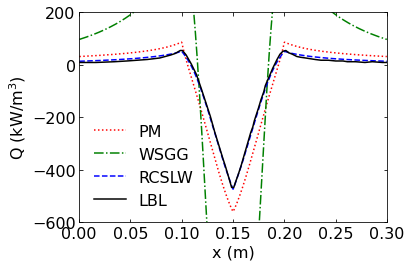

In [14]:
#-------------- LBL data

lbl  = np.loadtxt('LBLdata/ex_S4_LBL.dat')

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(xQ, Qpm/1000,    'r:')
ax.plot(xQ, Qwsgg/1000,  'g-.')
ax.plot(xQ, Qrcslw/1000, 'b--')
ax.plot(lbl[:,0], lbl[:,1], 'k-')

ax.legend(['PM', 'WSGG', 'RCSLW', 'LBL'], frameon=False)
ax.set_xlabel(r'x (m)')
ax.set_ylabel(r'Q (kW/m$^3$)')
ax.set_xlim([0,0.3])
ax.set_ylim([-2000,500]);
plt.savefig('ex_S4a.pdf');

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(xQ, Qpm/1000,    'r:')
ax.plot(xQ, Qwsgg/1000,  'g-.')
ax.plot(xQ, Qrcslw/1000, 'b--')
ax.plot(lbl[:,0], lbl[:,1], 'k-')

ax.legend(['PM', 'WSGG', 'RCSLW', 'LBL'], frameon=False)
ax.set_xlabel(r'x (m)')
ax.set_ylabel(r'Q (kW/m$^3$)')
ax.set_xlim([0,0.3])
ax.set_ylim([-600,200]);
plt.savefig('ex_S4b.pdf');

# Example S5
* L = 2 m domain
* P = 1 atm
* Black walls at T(0)=1500 K, T(L)=500 K.
* Uniform mole fraction of water vapor is 0.1.
* Sinusoidal temperature profile: $T(x)=1000 + 500\cos(\pi x/L)$ K.
* In setting up the RCSLW model, the max temperature gives somewhat better results than using the average temperature.

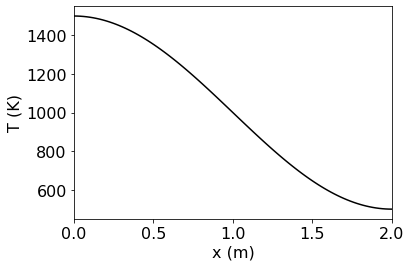

In [15]:
fig, ax = plt.subplots()
L = 2
x = np.linspace(0,L,100)
T = 1000 + 500*np.cos(np.pi*x/L)
ax.plot(x,T, 'k-')
ax.set_xlabel('x (m)')
ax.set_ylabel('T (K)')
ax.set_xlim([0,L]);

In [16]:
with _hide_print():
    xQ, QPM   = ex_S5('planckmean')
    xQ, QWSGG = ex_S5('wsgg')
    xQ, Q3    = ex_S5('rcslw', 3)
    xQ, Q4    = ex_S5('rcslw', 4)
    xQ, Q8    = ex_S5('rcslw', 8)
    xQ, Q25   = ex_S5('rcslw', 25)

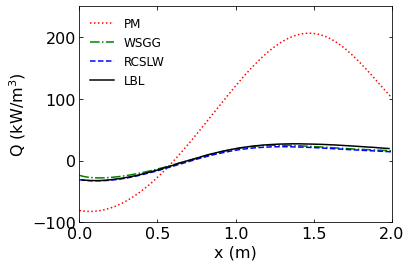

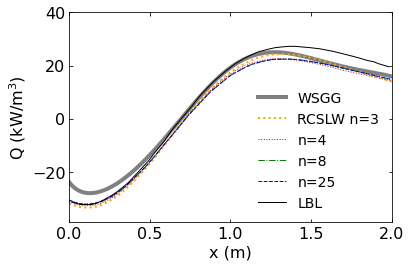

In [17]:
#-------------- LBL data

lbl  = np.loadtxt('LBLdata/ex_S5_LBL.dat')

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(xQ, QPM/1000,       'r:')
ax.plot(xQ, QWSGG/1000,     'g-.')
ax.plot(xQ, Q4/1000,        'b--')
ax.plot(lbl[:,0], lbl[:,1], 'k-')

ax.legend(['PM', 'WSGG', 'RCSLW', 'LBL'], frameon=False, fontsize=12)
ax.set_xlabel(r'x (m)')
ax.set_ylabel(r'Q (kW/m$^3$)')
ax.set_xlim([0,2])
ax.set_ylim([-100,250]);
plt.savefig('ex_S5a.pdf');

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(xQ, QWSGG/1000, '-',  color='gray', linewidth=4)
ax.plot(xQ, Q3/1000,  ':',  color='orange', linewidth=2)
ax.plot(xQ, Q4/1000,  'r:', linewidth=1)
ax.plot(xQ, Q8/1000,  'g-.', linewidth=1)
ax.plot(xQ, Q25/1000, 'b--',  linewidth=1)
ax.plot(lbl[:,0],   lbl[:,1],   'k-', linewidth=1)

ax.legend(['WSGG', 'RCSLW n=3', 'n=4', 'n=8', 'n=25', 'LBL'], frameon=False, fontsize=14)
ax.set_xlabel(r'x (m)')
ax.set_ylabel(r'Q (kW/m$^3$)')
ax.set_xlim([0,2])
ax.set_ylim([-39,40]);
plt.savefig('ex_S5b.pdf');

### Setup RCSLW using T$_{max}$ instead of T$_{avg}$

In [18]:
with _hide_print():
    use_Tmax = True
    xQ, QWSGG = ex_S5('wsgg')
    xQ, Q3    = ex_S5('rcslw', 3,  use_Tmax)
    xQ, Q4    = ex_S5('rcslw', 4,  use_Tmax)
    xQ, Q8    = ex_S5('rcslw', 8,  use_Tmax)
    xQ, Q25   = ex_S5('rcslw', 25, use_Tmax)

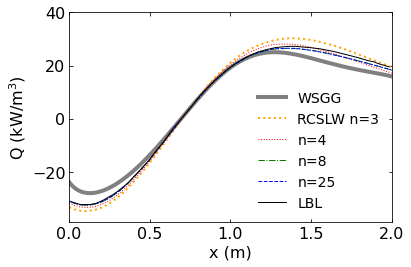

In [19]:
#-------------- LBL data

lbl  = np.loadtxt('LBLdata/ex_S5_LBL.dat')

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(xQ, QWSGG/1000, '-',  color='gray', linewidth=4)
ax.plot(xQ, Q3/1000,  ':',  color='orange', linewidth=2)
ax.plot(xQ, Q4/1000,  'r:', linewidth=1)
ax.plot(xQ, Q8/1000,  'g-.', linewidth=1)
ax.plot(xQ, Q25/1000, 'b--',  linewidth=1)
ax.plot(lbl[:,0],   lbl[:,1],   'k-', linewidth=1)

ax.legend(['WSGG', 'RCSLW n=3', 'n=4', 'n=8', 'n=25', 'LBL'], frameon=False, fontsize=14)
ax.set_xlabel(r'x (m)')
ax.set_ylabel(r'Q (kW/m$^3$)')
ax.set_xlim([0,2])
ax.set_ylim([-39,40]);
plt.savefig('ex_S5c.pdf');

# Example B3

* L = 1 m domain
* P = 1 atm
* Black walls at T(0)=400 K, T(L)=400 K.
* Symmetric temperature profile: $T(x) = 400 + 1400\sin(\pi x/L)^2.$
* Composition profile: $y_{H2O}(x) = 0.0001 + 0.9999\sin(\pi x/L)^2,$ $y_{CO2} = 1-y_{H2O}$.

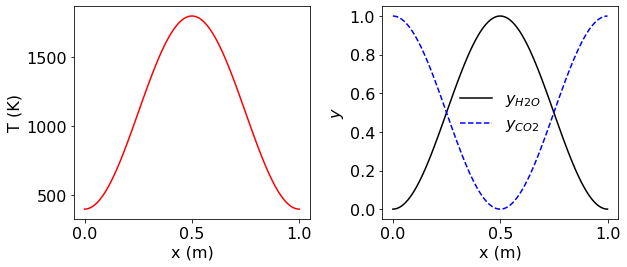

In [20]:
L = 1
x = np.linspace(0,L,100)
T = 400 + 1400*np.sin(np.pi*x/L)**2
yh2o = 0.0001 + 0.9999*np.sin(np.pi*x/L)**2
yco2 = 1-yh2o

fig,ax=plt.subplots(1,2,figsize=(9,4))
ax[0].plot(x,T,color='red')
ax[0].set_xlabel('x (m)')
ax[0].set_ylabel('T (K)')
ax[1].plot(x,yh2o, 'k-')
ax[1].plot(x,yco2, 'b--')
ax[1].set_xlabel('x (m)')
ax[1].set_ylabel(r'$y$');
ax[1].legend([r'$y_{H2O}$', r'$y_{CO2}$'], frameon=False);

In [21]:
with _hide_print():
    x,xQ,qPM,QPM       = ex_B3('planckmean')
    x,xQ,qWSGG,QWSGG   = ex_B3('wsgg')
    x,xQ,qRCSLW,QRCSLW = ex_B3('rcslw')

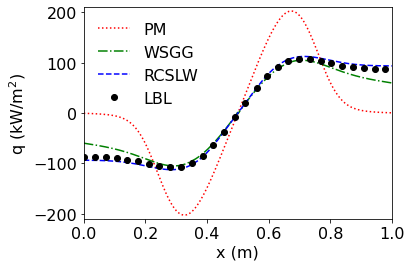

In [22]:
lbl  = np.loadtxt('LBLdata/ex_B3_LBL.dat')

plt.plot(x,qPM/1000,   'r:')
plt.plot(x,qWSGG/1000, 'g-.')
plt.plot(x,qRCSLW/1000, 'b--')
plt.plot(lbl[:,0],lbl[:,1],'ko')
plt.xlim([0,1])
plt.ylim([-210,210])
plt.legend(['PM', 'WSGG', 'RCSLW', 'LBL'], frameon=False)
plt.xlabel('x (m)')
plt.ylabel(r'q (kW/m$^2$)');
plt.savefig('ex_SB3.pdf')

# Example Sb1

* L = 1 m domain
* P = 1 atm
* Cold black walls
* Uniform temperature and composition with T=1000 K, $y_{H2O}=0.2$, $y_{CO2} = 0.1$, $y_{CO}=0.03$.
* Uniform soot with volume fractions of 0.01, 0.1, and 1 ppmv.

In [61]:
with _hide_print():
    xQ, Q001 = ex_Sb1('rcslw', 1E-8, 4)
    xQ, Q01  = ex_Sb1('rcslw', 1E-7, 4)
    xQ, Q1   = ex_Sb1('rcslw', 1E-6, 4)
    xPM, QPM001  = ex_Sb1('planckmean', 1E-8)
    xPM, QPM01   = ex_Sb1('planckmean', 1E-7)
    xPM, QPM1    = ex_Sb1('planckmean', 1E-6)

lbl  = np.loadtxt('LBLdata/ex_Sb1_LBL.dat')

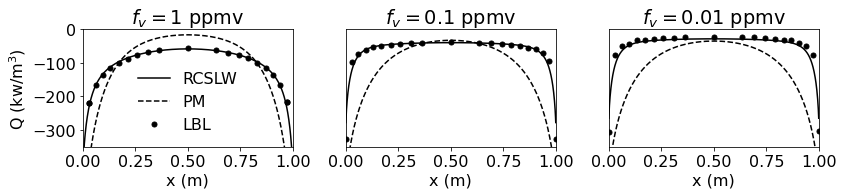

In [63]:
fig,ax=plt.subplots(1,3,figsize=(12,3))

plt.subplot(1,3,1)
plt.plot(xQ, Q1/1000,        'k-', ms=5)
plt.plot(xPM, QPM1/1000,     'k--',ms=5)
plt.plot(lbl[:,0], lbl[:,1], 'ko', ms=5)
plt.title(r'$f_v=1$ ppmv')
plt.xlabel('x (m)')
plt.ylabel(r'Q (kw/m$^3$)')
plt.xlim([0,1])
plt.ylim([-350,0])
plt.yticks([-300,-200,-100,0])
plt.legend(['RCSLW', 'PM', 'LBL'], frameon=False)

plt.subplot(1,3,2)
plt.plot(xQ, Q01/1000,       'k-', ms=5)
plt.plot(xPM, QPM01/1000,    'k--',ms=5)
plt.plot(lbl[:,2], lbl[:,3], 'ko', ms=5)
plt.title(r'$f_v=0.1$ ppmv')
plt.xlabel('x (m)')
plt.xlim([0,1])
plt.ylim([-350,0])
plt.yticks([]);

plt.subplot(1,3,3)
plt.plot(xQ, Q001/1000,      'k-', ms=5)
plt.plot(xPM, QPM001/1000,   'k--',ms=5)
plt.plot(lbl[:,4], lbl[:,5], 'ko', ms=5)
plt.title(r'$f_v=0.01$ ppmv')
plt.xlabel('x (m)')
plt.xlim([0,1])
plt.ylim([-350,0])
plt.yticks([]);